In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["n/a","na", "--"]
e_train = pd.read_csv("https://raw.githubusercontent.com/JF1220/HF-LGCC-/main/Electric%20Train.csv")
e_clean = pd.read_csv("https://raw.githubusercontent.com/JF1220/HF-LGCC-/main/Electric%20Clean.csv")

# Research Question
how versatile are electric cars in todays time, is there an option for everyones style preference

# Review Data
Checking columns to see what research question can be made from the data provided

In [3]:
e_train.head(3)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18


In [4]:
e_clean.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


In [5]:
e_train.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

In [9]:
e_clean.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

# Cleaning Data
removing columns that are unnecessary for my research

In [6]:
drop_cols_train =['VIN (1-10)','County', 'City', 'ZIP Code','Legislative District', 'DOL Vehicle ID',
       'Vehicle Location']

In [7]:
e_train.drop(drop_cols_train, inplace = True, axis=1)

In [8]:
e_train.head()

,ID,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility,Expected Price ($1k)
0,EV33174,WA,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,PUGET SOUND ENERGY INC,50
1,EV40247,WA,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,PUGET SOUND ENERGY INC,15
2,EV12248,WA,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,WA,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,WA,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [10]:
drop_cols_clean =['Efficiency_WhKm','Segment','PriceEuro']

In [11]:
e_clean.drop(drop_cols_clean, inplace = True, axis=1)

In [12]:
e_clean.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,940,Yes,AWD,Type 2 CCS,Sedan,5
1,Volkswagen,ID.3 Pure,10.0,160,270,250,Yes,RWD,Type 2 CCS,Hatchback,5
2,Polestar,2,4.7,210,400,620,Yes,AWD,Type 2 CCS,Liftback,5
3,BMW,iX3,6.8,180,360,560,Yes,RWD,Type 2 CCS,SUV,5
4,Honda,e,9.5,145,170,190,Yes,RWD,Type 2 CCS,Hatchback,4


# Definition of Electric Vehicle Type 
* BEV: a type of EV that uses the energy from the battery to drive the electric motor and no other source of energy is used

* PHEV: uses batteries to power an electric motor and another fuel, Such as gasoline, to power an internal combustion engine

In [15]:
e_train.groupby(['Electric Vehicle Type'])['Electric Range'].count()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            47869
Plug-in Hybrid Electric Vehicle (PHEV)    16484
Name: Electric Range, dtype: int64

# Body Style 
the amount of car brands/Makes that produce EV 

In [25]:
e_clean.groupby(['BodyStyle']).count()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,Seats
BodyStyle,,,,,,,,,,
Cabrio,3,3,3,3,3,3,3,3,3,3
Hatchback,32,32,32,32,32,32,32,32,32,32
Liftback,5,5,5,5,5,5,5,5,5,5
MPV,1,1,1,1,1,1,1,1,1,1
Pickup,3,3,3,3,3,3,3,3,3,3
SPV,3,3,3,3,3,3,3,3,3,3
SUV,45,45,45,45,45,45,45,45,45,45
Sedan,10,10,10,10,10,10,10,10,10,10
Station,1,1,1,1,1,1,1,1,1,1


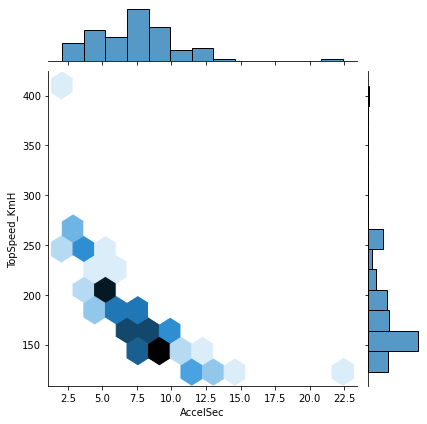

In [28]:
sns.jointplot (x='AccelSec', y= 'TopSpeed_KmH', data=e_clean, kind = 'hex')

# Conclusion
Electric Vehicles are performing at similar speeds as fuel powered vehicles, they are also available in other options including , Pickup, hatch, commerical and sport cars. At this rate the EV industry will spike in 2023 by 26% compared to 2023.